# 3. Hadamard Test

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

## Table of Contents

* [Proof](#proof)
    * [Real Hadamard Test](#RealHT)
    * [Imaginary Hadamard Test](#ImagHT)
* [Verification](#ver)
* [Error Analysis](#Err)

Although a state's phase does not affect the measurement probabilities, there are applications where the global phase must be measured. In these cases, the global phase needs to be encoded into something that is physically measurable. The simplest way to estimate the phase with a quantum computer is to use the Hadamard test (HT). This algorithm is a very useful tool for estimating the expectation value of a unitary operator with respect to a given state.
    
The unitary matrix, $U \in \mathbb{C}^{n\times n}$, is not generally hermitian, therefore, its eigenvalues are not necessarily real. This means to measure these values, they must be encoded into the control bit where the real and imaginary parts of the expectation value are measured separately via the real and imaginary Hadamard test, respectively. 

Measuring the control qubit in the real HT to be in the $|0\rangle$ or $|1\rangle$ state is represented with a random variable $X_\text{Re}$ being $|0\rangle$ or $|1\rangle$. Instead of referencing this random variable directly, we use the shorthand notation
$$\mathcal{P}_{{\rm{Re}}|0\rangle} := \mathbb{P}(X_\text{Re} \in \{|0\rangle\}) \quad\text{and} \quad \mathcal{P}_{{\rm{Re}}|1\rangle} := \mathbb{P}(X_\text{Re} \in \{|1\rangle\}).$$
Similarly, a random variable $X_\text{Im}$ being $|0\rangle$ or $|1\rangle$ describes the measurement of the control qubit in the imaginary HT, i.e., 
$$\mathcal{P}_{{\rm{Im}}|0\rangle} := \mathbb{P}(X_\text{Im} \in \{|0\rangle\}) \quad\text{and} \quad \mathcal{P}_{{\rm{Im}}|1\rangle} := \mathbb{P}(X_\text{Im} \in \{|1\rangle\}).$$

## Proof <a name="proof"></a>

### Real Hadamard Test <a name="RealHT"></a>

Looking at the real Hadamard test in $\text{Fig. }\#$, the intial state of the circuit can be written as

$$|\pi_0\rangle 
= |0\rangle \otimes |\psi\rangle 
= |0\rangle|\psi\rangle 
= \begin{pmatrix}1 \\ 0\end{pmatrix}|\psi\rangle$$

A Hadamard gate is then applied to the control qubit transforming it to the $|+\rangle$ state, i.e.,

$$|\pi_1\rangle 
= (H \otimes I) \cdot (|0\rangle|\psi\rangle)
= H|0\rangle I|\psi\rangle
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}|\psi\rangle
= \frac{1}{\sqrt{2}}\begin{pmatrix} (1\cdot 1) + (1\cdot 0) \\(1\cdot 1) + (-1\cdot 0) \end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\1 \end{pmatrix}|\psi\rangle
= \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right)|\psi\rangle 
= |+\rangle|\psi\rangle.$$

Next, a controlled-unitary gate is applied, which applies the $U$ operation to $|\psi\rangle$ if and only if the control qubit is $|1\rangle$, i.e.,

$$|\pi_2\rangle 
= CU|+\rangle|\psi\rangle
= \frac{1}{\sqrt{2}}|0\rangle I|\psi\rangle + \frac{1}{\sqrt{2}} |1\rangle U|\psi\rangle 
= \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle U \right)|\psi\rangle.$$

The last operation is a Hadamard gate on the control qubit, resulting in the state

$$|\pi_3\rangle 
= (H\otimes I)\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle U \right)|\psi\rangle 
= \frac{1}{2}\left(|0\rangle I|\psi\rangle + |1\rangle I|\psi\rangle + |0\rangle (U\times I) |\psi\rangle - |1\rangle (U \times I) |\psi\rangle \right)
= |0\rangle\frac{I+U}{2}|\psi\rangle + |1\rangle\frac{I-U}{2}|\psi\rangle$$

With the final state of the system, the measurement probablities can be computed. The probability of measuring the control qubit to be in the $|0\rangle$ state is

$$\mathcal{P}_{\text{Re}|0\rangle}
= |\langle 0|\pi_3\rangle|^2 
=\left| \langle 0|0\rangle\frac{I+U}{2}|\psi\rangle + \langle0|1\rangle\frac{I-U}{2}|\psi\rangle\right|^2 
= \left|\frac{I+U}{2}|\psi\rangle\right|^2 
= \frac{\langle \psi|(I+U^{\dagger})(I+U)|\psi\rangle}{4} 
= \frac{\langle \psi|(I+U+U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}.$$

Similarly, the probability of measuring the control qubit to be in the $|1\rangle$ state is

$$\mathcal{P}_{\text{Re}|1\rangle} 
= |\langle 1|\pi_3\rangle|^2 
= \left| \langle 1|0\rangle\frac{I+U}{2}|\psi\rangle + \langle 1|1\rangle\frac{I-U}{2}|\psi\rangle\right|^2 
= \left|\frac{I-U}{2}|\psi\rangle\right|^2 
= \frac{\langle \psi|(I-U^{\dagger})(I-U)|\psi\rangle}{4} 
= \frac{\langle \psi|(I-U-U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}.$$

Since $U$ is unitary, these probabilities can be simplified further using the fact that $U^\dagger U = I$, i.e.,

$$\mathcal{P}_{\text{Re}|0\rangle} 
=  \frac{\langle \psi|(I+U+U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} 
= \frac{\langle \psi|(2I+U+U^{\dagger})|\psi\rangle}{4} 
= \frac{2 + \langle \psi|(U+U^{\dagger})|\psi\rangle}{4},$$

$$\mathcal{P}_{\text{Re}|1\rangle} 
=  \frac{\langle \psi|(I-U-U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} 
= \frac{\langle \psi|(2I-U-U^{\dagger})|\psi\rangle}{4} 
= \frac{2 - \langle \psi|(U+U^{\dagger})|\psi\rangle}{4}.$$

For a unitary operator $U$, $\langle\alpha|U|\beta\rangle = (\langle\alpha|U|\beta\rangle)^\dagger = \langle\beta|U^{\dagger}|\alpha\rangle$. If $\alpha = \beta$, such as in our case, $\langle\psi|U|\psi\rangle^* = \langle\psi|U^{\dagger}|\psi\rangle$. Applying this and the fact that a number plus its complex conjugate is $2$ times the real part to our probablity equations, we find that

$$\mathcal{P}_{\text{Re}|0\rangle} 
= \frac{2 + \langle \psi|(U+U^{\dagger})|\psi\rangle}{4} 
= \frac{2 + 2\text{Re}\langle\psi|U|\psi\rangle}{4} 
= \frac{1}{2}(1+\text{Re}\langle\psi|U|\psi\rangle),$$

$$\mathcal{P}_{\text{Re}|1\rangle} 
= \frac{2 - \langle \psi|(U+U^{\dagger})|\psi\rangle}{4} 
= \frac{2 - 2\text{Re}\langle\psi|U|\psi\rangle}{4} 
= \frac{1}{2}(1-\text{Re}\langle\psi|U|\psi\rangle).$$

With the probabilities of measuring $|0\rangle$ and $|1\rangle$ on the control qubit, the real component of the phase can be computed, i.e.,

$$\mathcal{P}_{\text{Re}|0\rangle} - \mathcal{P}_{\text{Re}|1\rangle}
= \frac{1}{2}(1+\text{Re}\langle\psi|U|\psi\rangle) - \frac{1}{2}(1-\text{Re}\langle\psi|U|\psi\rangle)
= \frac{1}{2}\text{Re}\langle\psi|U|\psi\rangle + \frac{1}{2}\text{Re}\langle\psi|U|\psi\rangle
=  \text{Re}\langle\psi|U|\psi\rangle,$$

$$2\mathcal{P}_{\text{Re}|0\rangle} - 1
= 2 \left(\frac{1}{2}(1+\text{Re}\langle\psi|U|\psi\rangle)\right) - 1
=  (1+\text{Re}\langle\psi|U|\psi\rangle)  - 1
=  \text{Re}\langle\psi|U|\psi\rangle,$$

$$1 - 2\mathcal{P}_{\text{Re}|1\rangle}
=  1  2 \left(\frac{1}{2}(1-\text{Re}\langle\psi|U|\psi\rangle)\right)
=  1-(\text{Re}\langle\psi|U|\psi\rangle - 1)
=  \text{Re}\langle\psi|U|\psi\rangle.$$

Therefore, the real expectation value can be found from these probabilities in the following three different ways:

$$\mathcal{P}_{\text{Re}|0\rangle} - \mathcal{P}_{\text{Re}|1\rangle} = 2\mathcal{P}_{\text{Re}|0\rangle} - 1 = 1 - 2\mathcal{P}_{\text{Re}|1\rangle} =\text{Re}\langle\psi|U|\psi\rangle.$$

### Imaginary Hadamard Test <a name="ImagHT"></a>

The approach to obtain the imaginary part of the expectation value is almost exactly the same as the real part. This time, though, we will use the imaginary Hadamard test circuit which contains the addition of a phase gate $S^{\dagger} = \begin{pmatrix} 1 & 0\\0 & -i\end{pmatrix}$ on the control qubit as shown in $\text{Fig. }\#$. 

The first two states $|\pi_0\rangle$ and $|\pi_1\rangle$ are the same as for the real test,

$$|\pi_0\rangle 
= |0\rangle|\psi\rangle
= \begin{pmatrix}1\\0\end{pmatrix}|\psi\rangle,$$

$$|\pi_1\rangle 
= H|0\rangle|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\1 \end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right)|\psi\rangle 
= |+\rangle|\psi\rangle.$$

Now the phase gate $S^{\dagger}$ is applied giving the state

$$|\pi_2\rangle 
= S^{\dagger}|+\rangle|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0\\0 & -i\end{pmatrix}\begin{pmatrix} 1\\1\end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} (1\cdot 1) +  (0\cdot 1)\\(0\cdot 1) + (-i\cdot 1)\end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\-i\end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle \right)|\psi\rangle = |-i\rangle|\psi\rangle.$$

Performing the controlled-$U$ we get

$$|\pi_3\rangle 
= CU|-i\rangle|\psi\rangle 
= \frac{1}{\sqrt{2}}\left(|0\rangle I|\psi\rangle - i|1\rangle U|\psi\rangle\right)
= \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle U\right)|\psi\rangle.$$

Lastly, the second Hadamard gate is applied to the control qubit which gives the state

$$|\pi_4\rangle
= (H\otimes I)\frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle U\right)|\psi\rangle
= \frac{1}{2}\left[(|0\rangle + |1\rangle) I - i(|0\rangle - |1\rangle)U\right]|\psi\rangle 
= |0\rangle\frac{I-iU}{2}|\psi\rangle + |1\rangle\frac{I+iU}{2}|\psi\rangle.$$

Using the same approach as for the real test, the probability of measuring the control qubit to be in the $|0\rangle$ state is

$$\mathcal{P}_{\text{Im}|0\rangle} 
= |\langle 0|\pi_3\rangle |^2 
= \left|\langle 0|0\rangle\frac{I-iU}{2} + \langle 0|1\rangle\frac{I+iU}{2}|\psi\rangle|\psi\rangle\right|^2 
= \left|\frac{I-iU}{2}|\psi\rangle\right|^2 
= \frac{\langle \psi|(I+iU^{\dagger})(I-iU)|\psi\rangle}{4} 
= \frac{\langle \psi|(I-iU+iU^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}.$$

The probability of measuring the control qubit to be in the $|1\rangle$ state is

$$\mathcal{P}_{\text{Im}|1\rangle} 
= |\langle 1 | \pi_3 \rangle|^2 
= \left|\langle 1|0\rangle\frac{I-iU}{2} + \langle 1|1\rangle\frac{I+iU}{2}|\psi\rangle\right|^2 
= \left|\frac{I+iU}{2}|\psi\rangle\right|^2 
= \frac{\langle \psi|(I-iU^{\dagger})(I+iU)|\psi\rangle}{4} 
= \frac{\langle \psi|(I+iU-iU^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}.$$

These probabilities can again be simplified further using similar steps to the real circuit, i.e.,

$$\mathcal{P}_{\text{Im}|0\rangle} 
=  \frac{\langle \psi|(I-iU+iU^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} 
= \frac{2-\langle \psi|iU|\psi\rangle+\langle \psi|iU^{\dagger}|\psi\rangle}{4} 
= \frac{1}{2}+i\frac{-\langle \psi|U|\psi\rangle+\langle \psi|U^{\dagger}|\psi\rangle}{4}
= \frac{1}{2}+ \frac{2\text{Im}\langle\psi|U|\psi\rangle}{4} 
= \frac{1}{2}(1 + \text{Im}\langle\psi|U|\psi\rangle),$$

$$\mathcal{P}_{\text{Im}|1\rangle} 
=  \frac{\langle \psi|(I+iU-iU^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} 
= \frac{2+\langle \psi|iU|\psi\rangle-\langle \psi|iU^{\dagger}|\psi\rangle}{4} 
= \frac{1}{2}+i\frac{\langle \psi|U|\psi\rangle-\langle \psi|U^{\dagger}|\psi\rangle}{4} 
= \frac{1}{2} - \frac{2\text{Im}\langle\psi|U|\psi\rangle}{4} 
= \frac{1}{2}(1 - \text{Im}\langle\psi|U|\psi\rangle).$$

Following the same rules mentioned for the real test, subtracting $\mathcal{P}_{\text{Im}|1\rangle}$ from $\mathcal{P}_{\text{Im}|0\rangle}$ will give the imaginary part of the expectation value $\text{Im}\langle\psi|U|\psi\rangle$, i.e.,
$$\mathcal{P}_{\text{Im}|0\rangle} - \mathcal{P}_{\text{Im}|1\rangle} 
= \frac{1}{2}(1 + {\rm Im}\langle\psi|U|\psi\rangle) - \frac{1}{2}(1 - {\rm Im}\langle\psi|U|\psi\rangle) 
= {\rm Im}\langle\psi|U|\psi\rangle.$$

Therefore, the imaginary part of the expectation value can be found in the following three ways:
$$\mathcal{P}_{\text{Im}|0\rangle} - \mathcal{P}_{\text{Im}|1\rangle} 
= 1 - 2\mathcal{P}_{\text{Im}|1\rangle} 
= 2\mathcal{P}_{\text{Im}|0\rangle} - 1 
= \text{Im}\langle\psi|U|\psi\rangle.$$

 By combining these real and imaginary results, the expectation value $\langle\psi|U|\psi\rangle$ can be estimated.
        
Since the eigenvalue is of the form $e^{i\theta}$, Euler's formula can be used to convert this to $\cos\theta + i\sin\theta$ where $\cos\theta$ is the real part and $\sin\theta$ is the imaginary part. Thus $\text{Re}\langle\psi|U|\psi\rangle = \cos\theta$ and
$\text{Im}\langle\psi|U|\psi\rangle = \sin\theta$. So the real probabilities can be written as

$$\mathcal{P}_{\text{Re}|0\rangle} 
= \frac{1}{2}(1+\text{Re}\langle\psi|U|\psi\rangle) 
= \frac{1}{2}(1+\cos\theta),$$
$$\mathcal{P}_{\text{Re}|1\rangle} 
= \frac{1}{2}(1-\text{Re}\langle\psi|U|\psi\rangle) 
= \frac{1}{2}(1-\cos\theta).$$

Therefore, $\theta$ can be estimated with

$$\theta 
= \arccos(2\mathcal{P}_{\text{Re}|0\rangle} - 1) 
= \arccos(1 - 2\mathcal{P}_{\text{Re}|1\rangle}).$$

The same can be done with the imaginary part of Euler's formula and the expectation value, i.e.,
        
$$\mathcal{P}_{\text{Im}|0\rangle} 
= \frac{1}{2}(1+\text{Im}\langle\psi|U|\psi\rangle) 
= \frac{1}{2}(1+\sin\theta),$$
$$\mathcal{P}_{\text{Im}|1\rangle} 
= \frac{1}{2}(1-\text{Im}\langle\psi|U|\psi\rangle) 
= \frac{1}{2}(1-\sin\theta).$$

Therefore, $\theta$ can also be estimated with
$$\theta 
= \arcsin(2\mathcal{P}_{{\rm{Im}}|0\rangle} - 1) 
= \arcsin(1 - 2\mathcal{P}_{{\rm{Im}}|1\rangle}).$$

Finally, $\theta$ can be estimated using both the real and imaginary expectation values. The real and imaginary expectation values can be thought of as vectors on the complex unit circle with the real part on the $x$-axis and the imaginary on the $y$-axis. By taking the $\arcsin$ of the imaginary part or the $\arccos$ of the real part, this is effectively finding the vector of the entire complex expectation value. This means that the $\arctan$ of the imaginary part over the real part also gives $\theta$. Therefore, the angle $\theta$ can be estimated with the following three methods:
$$\theta 
= \arccos(\text{Re}\langle\psi|U|\psi\rangle)
= \arcsin(\text{Im}\langle\psi|U|\psi\rangle) 
= \arctan\left(\frac{\text{Im}\langle\psi|U|\psi\rangle}{\text{Re}\langle\psi|U|\psi\rangle}\right).$$

Note that using both the real and imaginary parts to estimate $\theta$ increases the error of the estimation as this is using data from two random variables rather than just one.

## Verification <a name="ver"></a>

 We now exemplify the Hadamard test using Qiskit with the AerSimulator. This example estimates of the phase of
$$U 
= \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix}$$
using $1000$ shots where $\theta = 0.5625$.

In [5]:
angle = 0.5625 # Exact value of theta to estimate
shots = 1000 # number of times each circuit is run
print("Angle: ",angle, "rad")

Angle:  0.5625 rad


In [6]:
def re_HT(theta):
    circuit = QuantumCircuit(2,1) # Create circuit with 2 qubits and 1 classical bit
    circuit.x(1) # Apply pauli-x gate to q1 to put it to 1 state
    circuit.barrier(label='$|π_0$\u27e9')    
    circuit.h(0) # Apply hadamard gate to q0 to put it into + state
    circuit.barrier(label='$|π_1$\u27e9') 
    circuit.cp(theta,0,1) # rotates q1 theta radians if q0 is 1
    circuit.barrier(label='$|π_2$\u27e9') 
    circuit.h(0) # Apply second hadamard gate to q0 to ensure the value phi affects our output
    circuit.barrier(label='$|π_3$\u27e9')
    circuit.measure(0,0) # Measure q0
    return circuit

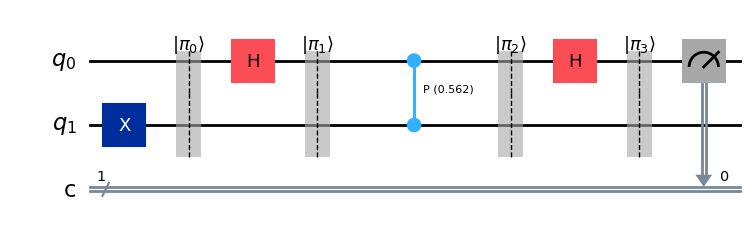

In [7]:
qcRe = re_HT(angle)
qcRe.draw('mpl')

In [8]:
def im_HT(theta):
    circuit = QuantumCircuit(2,1) #Create circuit with 2 qubits and 1 classical bit
    circuit.x(1) #Apply pauli-x gate to q1 to put it to 1 state
    circuit.barrier(label='$|π_0\u27e9$')
    circuit.h(0) #Apply hadamard gate to q0 to put it into + state
    circuit.barrier(label='$|π_1$\u27e9')
    circuit.sdg(0) #Apply phase gate to make imaginary
    circuit.barrier(label='$|π_2$\u27e9')
    circuit.cp(theta,0,1) #Rotates q0 2*pi*theta radians if q1 is 1
    circuit.barrier(label='$|π_3$\u27e9')
    circuit.h(0) #Apply second hadamard gate to q0 to ensure the value phi affects our output
    circuit.barrier(label='$|π_4$\u27e9')
    circuit.measure(0,0) #Measure q0
    return circuit

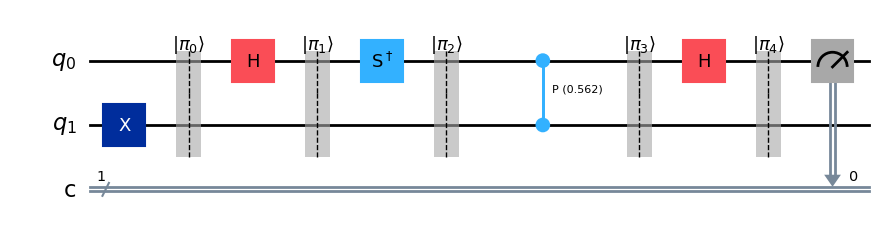

In [9]:
qcIm = im_HT(angle)
qcIm.draw('mpl')

In [10]:
sim = AerSimulator() # set simulator

In [11]:
transRe = transpile(qcRe, sim) # transpile real hadamard test circuit
resultRe = sim.run(transRe, shots = shots).result() # run transpiled circuit
countsRe = resultRe.get_counts() # retreive counts after measurement

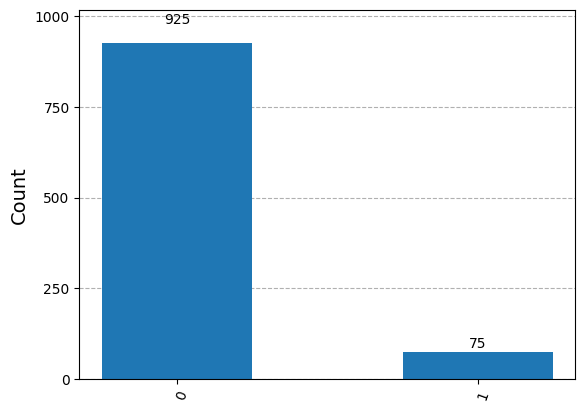

In [12]:
plot_histogram(countsRe) # plot real counts

In [13]:
transIm = transpile(qcIm, sim) # transpile imaginary hadamard test circuit
resultIm = sim.run(transIm, shots = shots).result() # run transpiled circuit
countsIm = resultIm.get_counts() # retreive counts after measurement

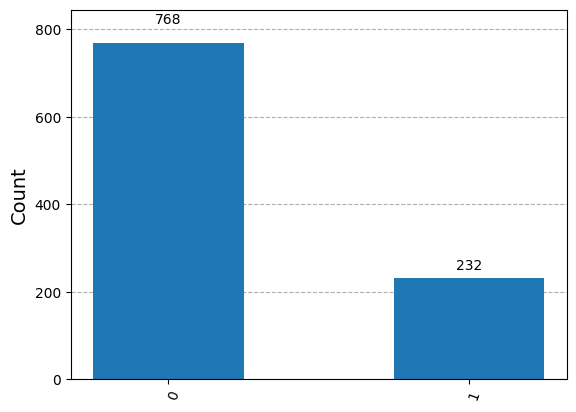

In [14]:
plot_histogram(countsIm) # plot imaginary counts

Using our computed equations for the measurement probability, the theoretical probabilities of measuring the control qubit of the real Hadamard test to be in the states $|0\rangle$ and $|1\rangle$ are
$$\mathcal{P}_{{\rm{Re}}|0\rangle} 
= \frac{1}{2}(1+\cos(0.5625)) \approx 0.9230 
\quad \text{and} \quad 
\mathcal{P}_{{\rm{Re}}|1\rangle} 
= \frac{1}{2}(1-\cos(0.5625)) \approx 0.0770.$$
The theoretical probabilities of measuring the control qubit of the imaginary Hadamard test to be in the states $|0\rangle$ and $|1\rangle$ are
$$\mathcal{P}_{{\rm{Im}}|0\rangle} 
= \frac{1}{2}(1+\sin(0.5625)) \approx 0.7667
\quad \text{and} \quad 
\mathcal{P}_{{\rm{Im}}|1\rangle} 
= \frac{1}{2}(1-\sin(0.5625)) \approx 0.2333.$$

The experimental probabilities of measuring $|0\rangle$ and $|1\rangle$ for the real hadamard test are
$$\mathcal{P}_{{\rm{Re}}|0\rangle} 
= 0.925
\quad \text{and} \quad 
\mathcal{P}_{{\rm{Re}}|1\rangle} 
= 0.075.$$
The experimental probabilities of measuring $|0\rangle$ and $|1\rangle$ for the imaginary hadamard test are
$$\mathcal{P}_{{\rm{Im}}|0\rangle} 
= 0.768
\quad \text{and} \quad 
\mathcal{P}_{{\rm{Im}}|1\rangle} 
= 0.232.$$
This shows that for both HTs, the theoretical and experimental values are very close.

In [15]:
print('For Real Part:\nCalculated probability of measuring 0:\t',0.5*(1 + np.cos(angle)))
print('Calculated probability of measuring 1:\t', 0.5*(1 - np.cos(angle)))

print('Probability of measuring 0:\t\t', countsRe['0']/shots)
print('Probability of measuring 1:\t\t', countsRe['1']/shots)

print('\nFor Imaginary Part:\nCalculated probability of measuring 0:\t',0.5*(1 + np.sin(angle)))
print('Calculated probability of measuring 1:\t', 0.5*(1 - np.sin(angle)))

print('Probability of measuring 0:\t\t', countsIm['0']/shots)
print('Probability of measuring 1:\t\t', countsIm['1']/shots)

For Real Part:
Calculated probability of measuring 0:	 0.922962249615534
Calculated probability of measuring 1:	 0.07703775038446603
Probability of measuring 0:		 0.925
Probability of measuring 1:		 0.075

For Imaginary Part:
Calculated probability of measuring 0:	 0.7666513367680101
Calculated probability of measuring 1:	 0.23334866323198994
Probability of measuring 0:		 0.768
Probability of measuring 1:		 0.232


Note that these probabilities both sum to $1$ as expected. If we cycle through values of $\theta$ from $0\text{ rad}$ to $2\pi\text{ rad}$ and plot the probabilities of measuring $|0\rangle$ or $|1\rangle$, we can see that they in fact always sum to 1.

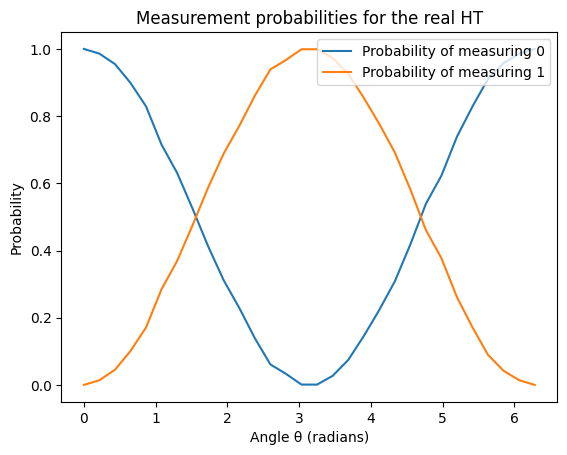

In [21]:
angles = np.linspace(0, 2*pi, 30) # create array of evenly spaced angles from 0 - 2 pi
prob0 = []
prob1 = []
for ang in angles:
    circ = re_HT(ang)
    shots = int(shots)
    trans = transpile(circ, sim) # transpile real hadamard test circuit
    result = sim.run(trans, shots = shots).result() # run transpiled circuit
    counts = result.get_counts() # retreive counts after measurement
    prob0val = counts.get('0')
    prob1val = counts.get('1')
    # compute probabilities from counts and append to a list
    if prob0val is not None and prob1val is not None:        
        prob0.append(counts['0']/shots)
        prob1.append(counts['1']/shots)
    elif prob0val is None:
        prob0.append(0)
        prob1.append(counts['1']/shots)
    elif prob1val is None:
        prob1.append(0)
        prob0.append(counts['0']/shots)
plt.plot(angles, prob0, label = 'Probability of measuring 0')
plt.plot(angles, prob1, label = 'Probability of measuring 1')
plt.xlabel('Angle \u03B8 (radians)')
plt.ylabel('Probability')
plt.title('Measurement probabilities for the real HT')
plt.legend(loc = 'upper right')
plt.show()

With the probabilities for each circuit, $\text{Re}\langle\psi|U|\psi\rangle$ and $\text{Im}\langle\psi|U|\psi\rangle$ can be found using any of the equations mentioned above. This gives the expecation values
$$\text{Re}\langle\psi|U|\psi\rangle 
= 0.850 
\quad \text{and} \quad 
\text{Im}\langle\psi|U|\psi\rangle 
= 0.536.$$

In [22]:
print("Results of the Trial: ") # display counts for both circuits
print("Real Circuit:  \t",countsRe)
print("Imginary Circuit:\t",countsIm)

# obtain probabilities from counts
re_p0 = countsRe['0']/shots
re_p1 = countsRe['1']/shots
im_p0 = countsIm['0']/shots
im_p1 = countsIm['1']/shots

# compute the real and imaginary expectation values
# any of the commented equations can be used
re = re_p0 - re_p1
#re = 2*(re_p0) - 1
#re = 1 - 2*(re_p1)

im = im_p0 - im_p1
#im = 2*(im_p0) - 1
#im = 1 - 2*(im_p1)

print('\nRe\u27e8\u03c8|U|\u03c8\u27e9 = ',re) # display both the real and imaginary expectation values 
print('Im\u27e8\u03c8|U|\u03c8\u27e9 = ',im)

Results of the Trial: 
Real Circuit:  	 {'0': 925, '1': 75}
Imginary Circuit:	 {'0': 768, '1': 232}

Re⟨ψ|U|ψ⟩ =  0.8500000000000001
Im⟨ψ|U|ψ⟩ =  0.536


Finally, either or both of these values can be used to estimate the phase angle $\theta$.

Since the trigonometric functions are cyclic, the inverse trigonometric functions have multiple possible values of $\theta$. The standard for these types of functions is to return the value closest to zero which is not necessarily the true phase. To get around this, the outputs of both $\arccos$ and $\arcsin$ are used to determine which quadrant the phase is in.

The function $\arccos$ ranges from $0$ to $\pi$, and $\arcsin$ from $-\pi/2$ to $\pi/2$. $\arccos$ is used to determine if the angle is in the positive $x$ or negative $x$ part of the graph, and $\arcsin$ is used to determine if it is in the positive $y$ or negative $y$ part of the graph. Using the angle returned from $\arccos$, if $\arcsin$ gives a  negative value, then the angle must be found in the negative $y$ part of the graph. To do this, the estimated angle can be set to $2\pi-\theta$. Using the angle returned from $\arcsin$, if $\arccos$ gives a value greater than $\pi/2$, then the angle must be determined in the negative $x$ part of the graph. To do this, the estimated angle is set to $\pi-\theta$. A graphical explanation can be found <a href="https://www.desmos.com/calculator/oebpz5tpyt">here</a>.

In [23]:
# choose a trig function to extract the angle
equation_number = 1 # use cosine to determine angle and sine to determine sign
# equation_number = 2 # use sine to determine angle and cosine to determine sign
# equation_number = 3 # use tan to determine angle

In [24]:
# adjust the phase value depending on the trig function used to extract the angle
ans = 0
if equation_number == 1:
    cos_angle = np.arccos(re)
    if  np.arcsin(im)<0:
        ans = 2*pi - cos_angle
    else:
        ans = cos_angle
elif equation_number == 2:
    sin_angle = np.arcsin(im)
    if  np.arccos(re)>pi/2:
        ans = pi - sin_angle
    else:
        ans = sin_angle
else:
    ans = np.arctan2(im,re)

# make sure the angle is positive for comparision
if ans < 0: ans = ans + 2*pi
print("\nEstimated phase angle:\t", ans) # display both expected and estimated phase angle
print("Exact phase angle:\t", angle)


Estimated phase angle:	 0.5548110329800713
Exact phase angle:	 0.5625


This example estimated the phase angle $\theta = 0.5625$ to be $\theta = 0.5548$. The accuracy of this estimation is directly dependent on the number of shots, which is how many times the circuit is run. The more shots used, the more accurate the probabilities will be and thus the expectation values and phase angle will be estimated to higher precision. Next, we will connect the convergence behavior to Monte-Carlo type estimators providing a rate of convergence for the HTs.

## Error Analysis <a name="Err"></a>

In statistical analysis, it is often necessary to estimate the probability distribution of some random variable based on a finite set of observations. This can be done using the empirical distribution function (EDF). In the context of quantum computing where it is typical to perform repeated measurements (shots), the EDF provides an estimate of the cumulative distribution of possible outcomes based on these measurement results. 

Each measurement outcome from a quantum computer corresponds to an independent and identically distributed (i.i.d) random variable. By performing $N_s$ shots, we can approximate the true distribution of the quantum system. The EDF is defined as 
$$\hat{F}(x) 
= \frac{1}{N_s}\sum_{i=1}^{N_s}\unicode{x1D7D9}_{\{X_i\leq x\}},$$
where $X_i \sim X$ are i.i.d. and are corresponding to each measurement result. Here, $\unicode{x1D7D9}_{\{X_i\leq x\}}$ is the indicator function which returns $1$ when $X_i\leq x$ and $0$ otherwise. This formula gives the proportion of outcomes that are less than or equal to some given value $x$ thus serving as an estimator of the cumulative distribution function.

It is often necessary to estimate the probability of a specific outcome. This is a special case of the EDF where it simplifies to the empirical probability estimator which focuses on the proportion of trials yielding a specific outcome. For example, the probability of measuring $0$ on a quantum computer with $N_s$ shots is estimated by
$$\hat{p}_0 = \frac{1}{N_s}\sum_{i=1}^{N_s}\unicode{x1D7D9}_{\{0\}}(X_i).$$
This is called a Monte-Carlo type estimator which uses repeated sampling to predict the probability of a variety of outcomes. Recall that for the HTs, only a single qubit is measured and thus the $X_i$'s are Bernoulli distributed. Tying single-qubit measurement to common probability theory, it is apparent that by the weak law of large numbers, $\hat{p}_0$ in converges to ${p}_0 = \mathbb{E}(X)$ in probability.

More generally, the average of $N_s$ single qubit measurements converges in probability. Moreover, the convergence rate of the empirical estimator $\hat{p}_0$ can be computed from the variance
$$\mathbb{V}(\hat{p}_0)
% = \frac{1}{N_s^2} \sum_{i=1}^{N_s} \left( \mathbb{E}(\unicode{x1D7D9}_{\{0\}}(X_i)^2) - \mathbb{E}(\unicode{x1D7D9}_{\{0\}}(X_i))^2 \right)
% = \frac{1}{N_s^2} \sum_{i=1}^{N_s} \left( p_0 - p_0^2 \right)
= \frac{p_0(1 - p_0)}{N_s},$$
which yields the standard deviation
$$\sigma 
= \sqrt{\frac{p_0(1 - p_0)}{N_s}}.$$

Taking $N_s$ single qubit measurements with an accuracy goal of $\epsilon > 0$, the number of shots required to recover $p_0$ with precision $\epsilon$ via $\hat{p}_0$ scales as
$$\epsilon \geq \sigma 
= \sqrt{\frac{p_0(1-p_0)}{N_s}} 
\Rightarrow \epsilon ^2 \geq \frac{p_0(1-p_0)}{N_s} 
\Rightarrow N_s 
\geq \frac{p_0(1-p_0)}{\epsilon ^2} \in \Omega \left(\frac{1}{\epsilon ^2}\right).$$
        
The variance of the control qubit's output is dependent on $p_0$ and thus $\sigma$. Plotting $\sigma$ against $N_s$, it is clear that the error approaches zero as the number of shots increases. The table also shows the estimated angle approaching $\theta = 0.5625$ and the error approaching $0$ as the number of shots increases.

In [19]:
# Construct a graph of error verses number of shots
trials = np.logspace(3, 5, 20)
Ns = []
error_diff = []
for num_of_shots in trials:
    num_of_shots = int(num_of_shots)
    Retrans = transpile(qcRe, sim) # transpile real hadamard test circuit
    Reresult = sim.run(Retrans, shots = num_of_shots).result() # run transpiled circuit
    Recounts = Reresult.get_counts() # retreive counts after measurement
    
    Imtrans = transpile(qcIm, sim) # transpile imaginary hadamard test circuit
    Imresult = sim.run(Imtrans, shots = num_of_shots).result() # run transpiled circuit
    Imcounts = Imresult.get_counts() # retreive counts after measurement
    
    p0Re = p1Re = p0Im = p1Im = 0

    # obtain probabilities from counts
    if Recounts.get('0') is not None:
        p0Re = Recounts['0']/num_of_shots
        
    if Recounts.get('1') is not None:
        p1Re = Recounts['1']/num_of_shots
        
    if Imcounts.get('0') is not None:
        p0Im = Imcounts['0']/num_of_shots
        
    if Imcounts.get('1') is not None:
        p1Im = Imcounts['1']/num_of_shots

    # compute expectation values from counts
    rex = p0Re - p1Re
    imx = p0Im - p1Im

    # compute monte-carlo error
    error_diff.append((p0Re*(1 - p0Re)/num_of_shots)**(0.5))
    Ns.append(num_of_shots**(-0.5))

error_diff=np.array(error_diff)

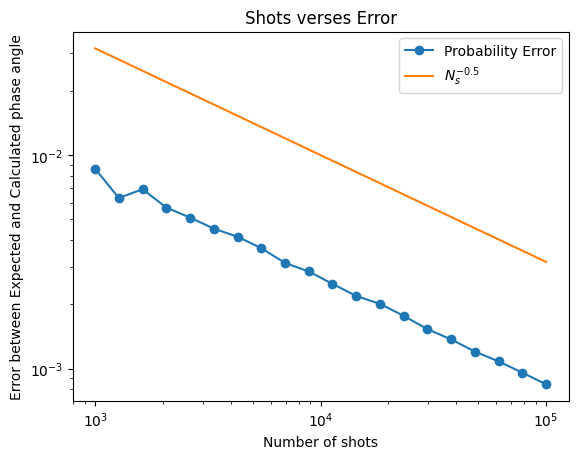

In [20]:
plt.loglog(trials, error_diff, label = 'Probability Error',marker='o')
plt.loglog(trials, Ns, label = '$N_s^{-0.5}$')
plt.title("Shots verses Error")
plt.xlabel("Number of shots")
plt.ylabel("Error between Expected and Calculated phase angle")
plt.legend(loc='upper right')
plt.show()

|Shot Count | Estim.~Angle $\theta$ | Error | 
|----|----|----|
100 | 0.4027 | 0.1598 | 
500 | 0.4864 | 0.0761 |
1000 | 0.5394 | 0.0231 |
5000 | 0.5830 | 0.0205 |
10000 | 0.5698 | 0.0073 |
50000 | 0.5569 | 0.0056 |
100000 | 0.5620 | 0.0005 |